In [1]:
#importng all libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Data Preprocessing

In [5]:
#Checking for missing values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There is no categorical data therefore there is no need for encoding

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000   0.103839     0.141696           0.067641   
GRE Score            0.103839   1.000000     0.827200           0.635376   
TOEFL Score          0.141696   0.827200     1.000000           0.649799   
University Rating    0.067641   0.635376     0.649799           1.000000   
SOP                  0.137352   0.613498     0.644410           0.728024   
LOR                  0.003694   0.524679     0.541563           0.608651   
CGPA                 0.074289   0.825878     0.810574           0.705254   
Research             0.005332   0.563398     0.467012           0.427047   
Chance of Admit      0.008505   0.810351     0.792228           0.690132   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.         0.137352  0.003694  0.074289  0.005332          0.008505  
GRE Score          0.613498  0.524679  0.825878  0.563398          0.810351  
TOEFL

<AxesSubplot:>

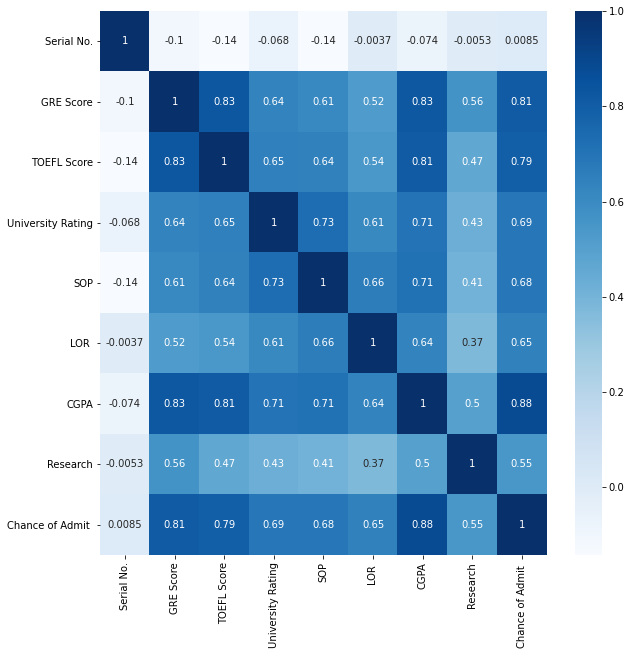

In [6]:
#Creating correlation matrix in order to remove any column with a high 
#correlation to another
corr_matrix = df.corr().abs()
print(corr_matrix)
#No columns have a correlation coefficient greater that 0.9 so none of them 
#can be deleted

#Visualizing the correlation coefficients
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
#You can observe that GRE,TOEFL scores and CGPA have the most correlation with the chance of admit

In [7]:
#Checking for outliers

print(df['GRE Score'].mean()," ",df['GRE Score'].median())
print(df['TOEFL Score'].mean()," ",df['TOEFL Score'].median())
print(df['University Rating'].mean()," ",df['University Rating'].median())
print(df['SOP'].mean()," ",df['SOP'].median())
print(df['LOR '].mean()," ",df['LOR '].median())
print(df['CGPA'].mean()," ",df['CGPA'].median())
print(df['GRE Score'].mean()," ",df['GRE Score'].median())
print(df['Research'].mean()," ",df['Research'].median())
print(df['Chance of Admit '].mean()," ",df['Chance of Admit '].median())

#No outliers have been discovered

316.472   317.0
107.192   107.0
3.114   3.0
3.374   3.5
3.484   3.5
8.576440000000003   8.56
316.472   317.0
0.56   1.0
0.7217399999999996   0.72


C:\Users\Ashier Fernandes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ashier Fernandes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ashier Fernandes\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Ashier Fernandes\anacon

array([[<AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:title={'center':'GRE Score'}>],
       [<AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'SOP'}>],
       [<AxesSubplot:title={'center':'Serial No.'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>]], dtype=object)

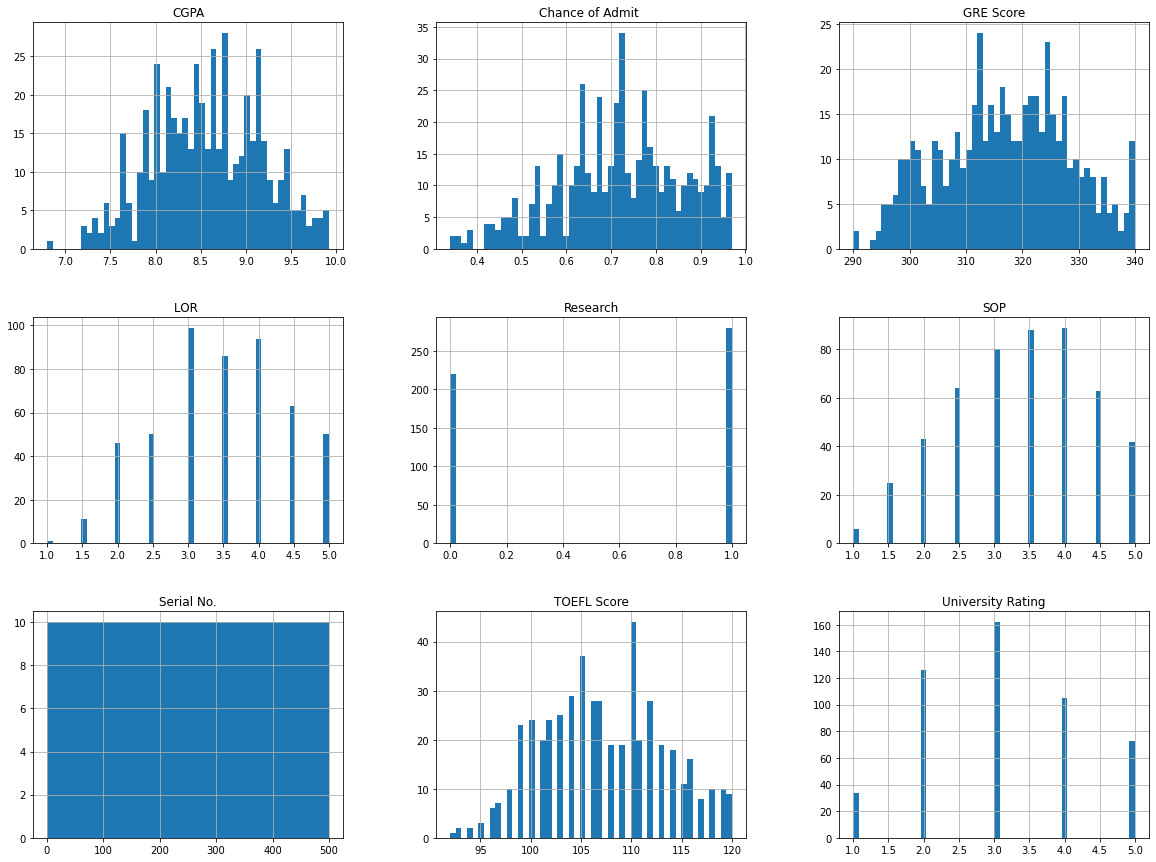

In [8]:
#Getting the distributions of each column (feature)
df.hist(bins=50, figsize=(20,15))

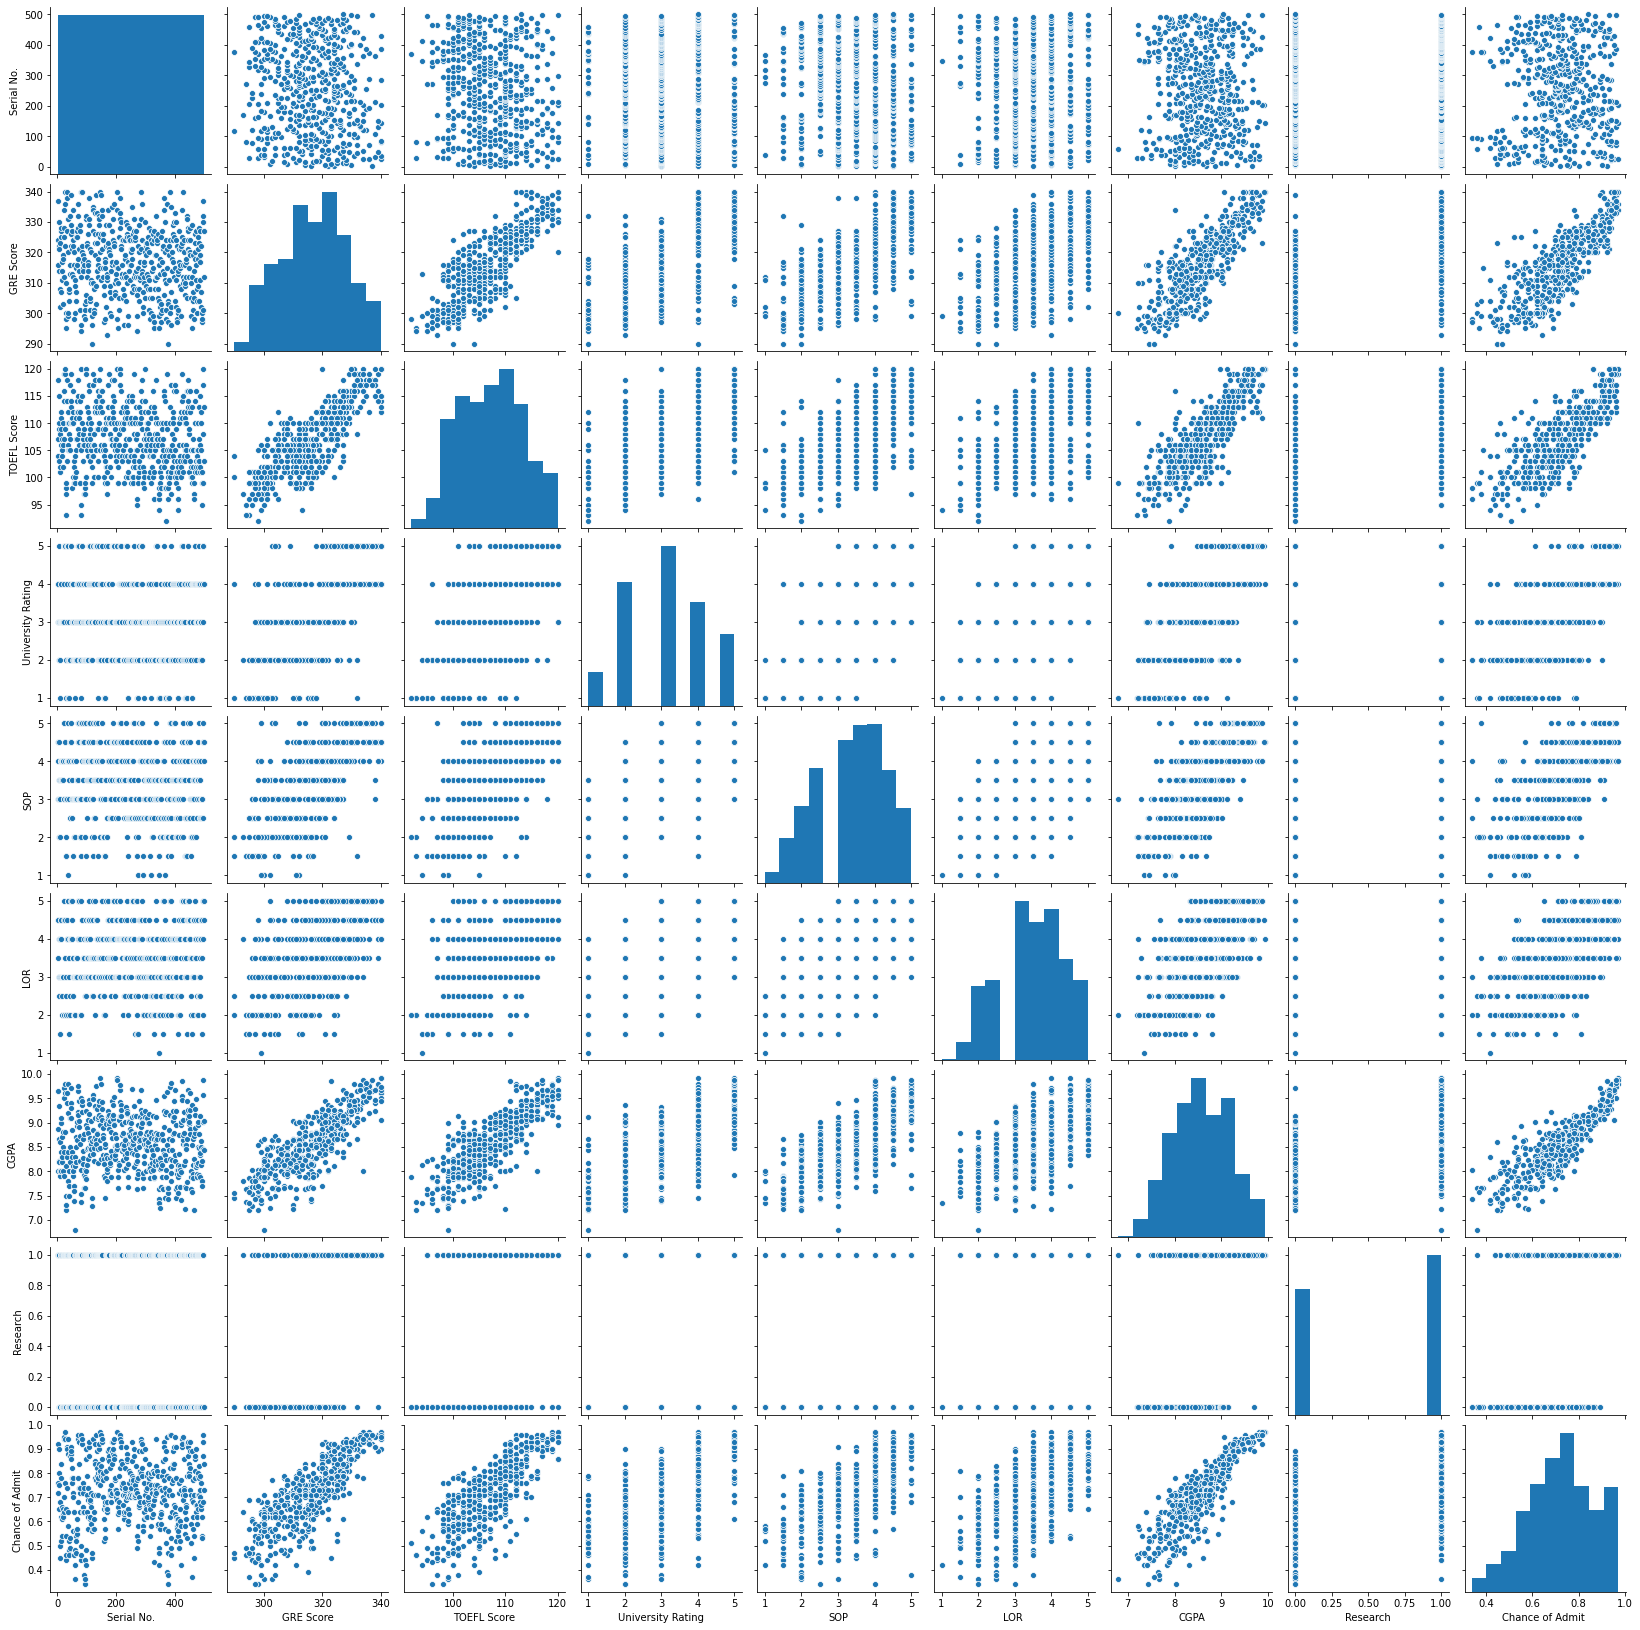

In [9]:
#A pairs plot allows us to see both distribution of single variables and 
#relationships between two variables. The pairs plot builds on two figures,
#the histogram and the scatter plot. The histogram allows us to see the 
#distribution of a single variable while the scatter plots shows the
#relationship between two variables.
import seaborn as sns
sns.pairplot(df)
#All the variables have a linear relationship with each other

In [10]:
#Splitting the dataset into dependent and independent variables.
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

# Feature Scaling

In [11]:
# Scaling the independent variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Performing PCA

[0.67519343 0.10596446 0.08023255 0.0543379  0.03766808 0.02546844
 0.02113513]


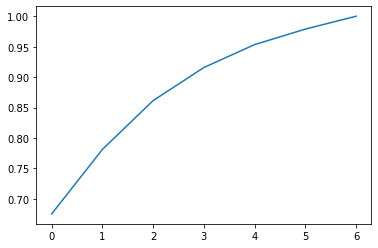

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None) 
#Since we dont know the explained variance of the x columns,
#we keep n_components as None
x=pca.fit_transform(x)
print(pca.explained_variance_ratio_)
#Visualization
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [13]:
#choosing n_components as 2
from sklearn.decomposition import PCA
pca=PCA(n_components=2) 
x=pca.fit_transform(x)
total_var =pca.explained_variance_ratio_
print(total_var)

[0.67519343 0.10596446]


In [15]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.04,random_state = 3)

In [16]:
##create and training random forest regressor model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=2)
components=rfr.fit(x_tr,y_tr)

In [17]:
y_pred = rfr.predict(x_te)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_te,y_pred)
rmse = mse**(0.5) 
mae=mean_absolute_error(y_te,y_pred)
r2=r2_score(y_te,y_pred,multioutput='variance_weighted')
print("Mean squared error=",mse)
print("Root mean squared error=",rmse)
print("Mean absolute error=",mae)
print("r^2 score=",r2)

Mean squared error= 0.002187650000000003
Root mean squared error= 0.04677232087463699
Mean absolute error= 0.036650000000000044
r^2 score= 0.89092291583566


In [24]:
import tkinter as tk
root=tk.Tk()

canvas1=tk.Canvas(root,width=500,height=500)
canvas1.pack()

#creating GRE score input box
label1=tk.Label(root,text='GRE Score')
canvas1.create_window(100,100,window=label1)
entry1=tk.Entry(root)
canvas1.create_window(270,100,window=entry1)

#Creating TOEFL score imput box
label2=tk.Label(root,text='TOEFL Score')
canvas1.create_window(120,120,window=label2)
entry2=tk.Entry(root)
canvas1.create_window(270,120,window=entry2)

#Creating University Rating input box
label3=tk.Label(root,text='University Rating')
canvas1.create_window(120,140,window=label3)
entry3=tk.Entry(root)
canvas1.create_window(270,140,window=entry3)

#Creating SOP input box
label4=tk.Label(root,text='SOP')
canvas1.create_window(120,160,window=label4)
entry4=tk.Entry(root)
canvas1.create_window(270,160,window=entry4)

#Creating LOR input box
label5=tk.Label(root,text='LOR')
canvas1.create_window(120,180,window=label5)
entry5=tk.Entry(root)
canvas1.create_window(270,180,window=entry5)

#creating CGPA input box
label6=tk.Label(root,text='CGPA')
canvas1.create_window(120,200,window=label6)
entry6=tk.Entry(root)
canvas1.create_window(270,200,window=entry6)

#Creating Research imput box
label7=tk.Label(root,text='Research')
canvas1.create_window(120,220,window=label7)
entry7=tk.Entry(root)
canvas1.create_window(270,220,window=entry7)

def values():
    global new_GREscore
    new_GREscore=int(entry1.get())
    
    global new_TOEFLscore
    new_TOEFLscore=int(entry2.get())
    
    global new_UniversityRating
    new_UniversityRating=float(entry3.get())
    
    global new_SOP
    new_SOP=float(entry4.get())
    
    global new_LOR
    new_LOR=float(entry5.get())
    
    global new_CGPA
    new_CGPA=float(entry6.get())
    
    global new_Research
    new_Research=int(entry7.get())
   
    global x
    x=df.iloc[:,1:-1]
    x=np.append(x,np.array([[new_GREscore,new_TOEFLscore,new_UniversityRating,new_SOP,new_LOR,new_CGPA,new_Research]]),axis=0)
    
    x=sc.fit_transform(x)
    pca=PCA(n_components=2)
    x=pca.fit_transform(x)
    
    AdmitChance=('Predicted chance of admission=',rfr.predict((x[-1,:]).reshape(1,-1)))
    label_AdmitChance = tk.Label(root,text=AdmitChance,bg='Cyan')
    canvas1.create_window(260,300,window=label_AdmitChance)
    np.delete(x,-1,0)
    
button1=tk.Button(root,text='Predict chance of admission',command=values,bg='Cyan')
canvas1.create_window(270,270,window=button1)
root.mainloop()

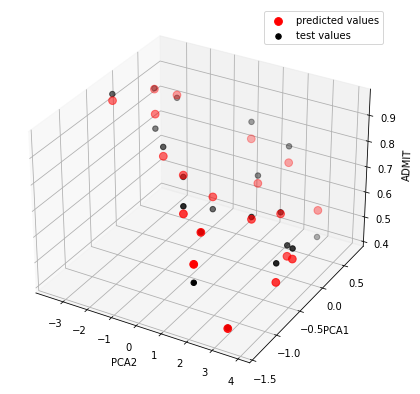

In [19]:
from mpl_toolkits import mplot3d
# to create a 3d plot we first create a matplotlib figure and 
# add a 3d subplot to it
ax = plt.figure(figsize=(7,7)) # creating a matplotlib figure
ax = ax.add_subplot(projection = '3d')

ax.scatter3D(x_te[:,0],x_te[:,1],y_pred,c = 'red',s=60 ,label='predicted values')
ax.scatter3D(x_te[:,0],x_te[:,1],y_te,c = 'black',s=30,label='test values')
ax.set_xlabel('PCA2')
ax.set_ylabel('PCA1')
ax.set_zlabel('ADMIT')
ax.legend()
plt.show()

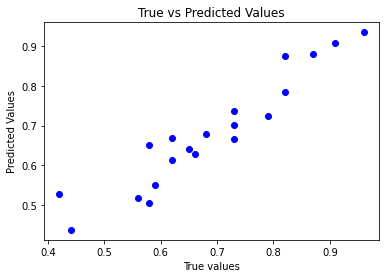

In [21]:
plt.scatter(y_te,y_pred,c='blue')
plt.xlabel('True values')
plt.ylabel('Predicted Values')
plt.title("True vs Predicted Values")
plt.show()

<AxesSubplot:>

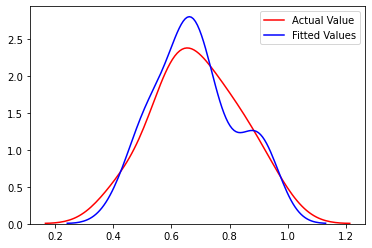

In [22]:
import F as sns
ax1 = sns.distplot(y_te, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

C:\Users\Ashier Fernandes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


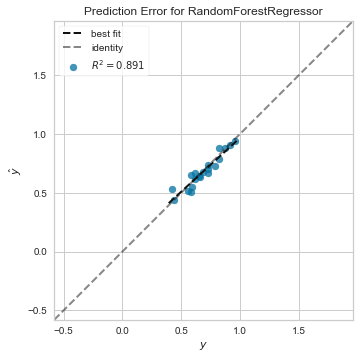

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [23]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rfr)

visualizer.fit(x_tr, y_tr)  # Fit the training data to the visualizer
visualizer.score(x_te, y_te)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure